# VIDEO-CLASSIFIER

## Project Overview

The name of this project is "VIDEO-CLASSIFIER". The main motive of this project is to classify video into different categories.Motivation for this project came from world's most popular entertainment service provider like "Netflix","Hotstar" etc. which uses the concept of video classifier to classify video into different categories in order to provide ease in finding a particular video on their platform.
The dataset for this project is not provided.Dataset will be created as a part of this project by scrapping videos information from Youtube.

## Problem Statement

The problem here is a bit simple.We will be given a video title and our task will be to classify this video title into 6 different categories by building a machine learning model.These 6  categories include:

1-Travel

2-Science and Technology

3-Food

4-Manufacturing

5-History

6-Art and Music

To accomplish this project following strategy is decided:

Step 1:-Create a separate dataset for each of the above mentioned category by scrapping videos information from Youtube using           Selenium's WebDriver.

Step 2:-Merge all the separate datasets into the final Dataset and load it into CSV file.

Step 4:-Creae a NLP pipeline for text processing.

Step 3:-Choose atleast 3 machine learning model and build and fit its pipeline on the dataset and record precision         score,recall score and f1 score for each of these model.

Step 4:- Visually compare the performance of all the choosen model by bar plot with the help of above mentioned metrics.

Step 5:- Choosing the final model based on performance comparison and concluding our project.

The expected model's performance would be greater than 90% in terms of accuracy.


## Metrics

The metrics  i will be using here is :

1-Precision Score

2-Recall Score

3-F1 Score

These 3 metrics are the most popular metrics for comparing machine learning models and i think it will be sufficient for getting  the  knowledge of overall performances of all the model selected. 

## Scrapping data from Youtube for different categories and creating a Dataset using         Selenium
   
   Selenium library has been used here to scrap video's information from Youtube.Selenium is a open-source web based              automation testing suite which is also used to perform web scrapping easily.Here ,in this project,Selenium's webdriver          class is used to extract all the necessary information from the videos to create Dataset.
   Following steps is implemented to scrap required information from youtube videos:
   
   1-Selenium package is installed and its webdriver class is imported  
  
   2-Chrome browser launched  and there Youtube.com is launched
   
   3-In the search box category name(for example-travel blog) is entered and the search is run with filter applied to videos        only.When the new page is loaded,URL of that web page is copied and is passed to 'get' function of webdriver object.It          open a new browser window .
   
   4-X-path of the anchor tag with id=video-title is copied and the link of all the videos in the web page is fetched and            appended in a list.
   
   5-A pandas dataframe is created with columns=['Id', 'Title', 'Description', 'Category']
   
   6-Finally,all the links  are traversed and run,all the required information from the videos is extracted and inserted in          the dataframe as a single row.
     
     
   This six step is executed separately for all the categories  to create  a separate dataset for each category and all these      individual dataset are merged together to give our final dataset
     
   

In [1]:
#installing Selenium library
!pip install selenium
import selenium

In [2]:
import nltk
nltk.download(['punkt', 'wordnet','stopwords'])

In [3]:
#importing required library
from selenium import webdriver 
import pandas as pd 
import numpy as np
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
from sklearn.preprocessing import LabelEncoder
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score,precision_score,recall_score
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Dropout,InputLayer,Activation
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=travel+blog&sp=EgIQAQ%253D%253D")

### Scrapping and creating a separate dataset for travel category

In [72]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

594


In [73]:
#creating dataframe for travel category
df_travel = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [74]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "travel"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_travel.loc[len(df_travel)] = [v_id, v_title, v_description, v_category]

In [75]:
df_travel.head()

,Id,Title,Description,Category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,n79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
2,2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ (‘MountainTr...,travel
3,Qvg1EW2FFmU,Travel Vlog | Weekend In Pondicherry | Kritika...,Equipment I use for filming: http://geni.us/vK...,travel
4,i5F7Xh9CO8U,EXPLORING VARANASI | Benaras Travel Vlog #1,Spent an incredible week exploring the beautif...,travel


In [76]:
#loading dataframe into csv file
df_travel.to_csv('df_travel.csv',index=False)

### Scrapping and creating a separate dataset for Science and technology category

In [27]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=science+and+technology&sp=EgIQAQ%253D%253D")

In [30]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

627


In [31]:
#creating dataframe for science and technology categoru
df_science_tech = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [32]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "science and technology"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_science_tech.loc[len(df_science_tech)] = [v_id, v_title, v_description, v_category]

In [39]:
df_science_tech.head()

,Id,Title,Description,Category
0,0DqpgV3w4,#SCIENCE & TECHNOLOGY #CURRENT AFFAIRS 2019 (J...,SCIENCE & TECHNOLOGY CURRENT AFFAIRS 2018 (JAN...,science and technology
1,f3NWvUV8MD8,Welcome To Future,Theories of technology often attempt to predic...,science and technology
2,BO5CchnV,Science and Technology | विज्ञानं एवं प्रोधोगि...,In this session in brief discussion on Science...,science and technology
3,NL01lQ,BBC Documentary 2017 - Future Space Travel Tec...,BBC Documentary 2017 - the edge of space - bb...,science and technology
4,Wjia3az6xRY,UPSC CSE Prelims 2019 Science & Technology Cur...,#StudyIQ Pendrive Courses for Various Govt. Ex...,science and technology


In [35]:
df_science_tech.to_csv('df_science_tech.csv',index=False)

### Scrapping and creating a separate dataset for Food category

In [40]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=food&sp=EgIQAQ%253D%253D")

In [41]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

462


In [45]:
links=links[1:]

In [42]:
#creating dataframe for food category

df_food = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [48]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "food"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_food.loc[len(df_food)] = [v_id, v_title, v_description, v_category]

In [49]:
df_food.head()

,Id,Title,Description,Category
0,GURlyb9I_B,North Korean Food in Seoul - RAINBOW NOODLES +...,🎥Go check out Mina’s Channel: https://www.yout...,food
1,0SPwwpruGIA,42 Foods You Need To Eat Before You Die | The ...,This is the ultimate must-try food bucket list...,food
2,g-7LKjur,Village Food in Pakistan - Chicken Curry by Gr...,► More Street Food in Pakistan: https://youtu...,food
3,XwHurP9RH-,42 Cheesy Foods You Need To Eat Before You Die...,"From pizza pot pies to cheeseburger dumplings,...",food
4,87If-Q2pJWQ,Philippines Street Food - AMAZING Filipino Foo...,One of the best Filipino food meals you can ea...,food


In [50]:
df_food.to_csv('df_food.csv',index=False)

### Scrapping and creating a separate dataset for Manufacturing category

In [51]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=manufacturing&sp=EgIQAQ%253D%253D")

In [52]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

614


In [53]:
#creating dataframe for manufacturing category

df_manufacturing = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [54]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "manufacturing"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_manufacturing.loc[len(df_manufacturing)] = [v_id, v_title, v_description, v_category]

In [55]:
df_manufacturing.head()

,Id,Title,Description,Category
0,N6zU3ePG0,Most Satisfying Manufacturing Process Never Se...,Watching satisfying manufacturing process vide...,manufacturing
1,5pn8qAKL0V4,Fast Extreme Automatic Car Manufacturing Facto...,Fast Extreme Automatic Car Manufacturing Facto...,manufacturing
2,YZzMk0NkgM,Satisfying Food Manufacturing Process You Must...,Food manufacturing involves strict processes t...,manufacturing
3,Ox0ED2ZM,GOLD Manufacture Process - Discover Heavyweigh...,Watch this video if you WANT to KNOW GOLD Manu...,manufacturing
4,V-tFtSePByQ,Do You Know ! How Are Steel Pipes Produced | S...,How Are #Steel #Pipes Produced | Steel Pipe #M...,manufacturing


In [56]:
df_manufacturing.to_csv('df_manufacturing.csv',index=False)

### Scrapping and creating a separate dataset for History category

In [57]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=history&sp=EgIQAQ%253D%253D")

In [58]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

417


In [59]:
#creating dataframe for history category

df_history = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [60]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "history"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_history.loc[len(df_history)] = [v_id, v_title, v_description, v_category]

In [61]:
df_history.head()

,Id,Title,Description,Category
0,jmp8CoZBI,One Direction - History (Official Video),One Direction's official music video for Histo...,history
1,PSnxA5HREg,Indian History : Ancient History | प्राचीन भारत,Ancient History of India in Hindi |indian hist...,history
2,BGjVbnU-TpA,"क्यूँ आये थे मुघल भारत में , जानिये असलीयत इति...","क्यूँ आयेथे मुघल भारत में , जानिये असलीयत इतिह...",history
3,XE3XJK8CG6I,5 Most Amazing Accidental Historical Discoveries,5 Most Amazing Accidental Historical Discoveri...,history
4,QJvyRLSl9U,In Search Of History - Ancient Inventions (His...,"Narrated by David Ackroyd\n\n"" The Nazca lines...",history


In [62]:
df_history.to_csv('df_history.csv',index=False)

### Scrapping and creating a separate dataset for Art and Music category

In [63]:
driver = webdriver.Chrome('chromedriver.exe') 
driver.get("https://www.youtube.com/results?search_query=art+and+music&sp=EgIQAQ%253D%253D")

In [64]:
#searching videos for video-title ans storing links of all videos
user_data = driver.find_elements_by_xpath('//*[@id="video-title"]')
links = []
for i in user_data:
            links.append(i.get_attribute('href'))

print(len(links))

546


In [65]:
#creating dataframe for art and music category

df_art_music = pd.DataFrame(columns = ['Id', 'Title', 'Description', 'Category'])


In [66]:
#extracting required information and adding it as a row in dataframe
wait = WebDriverWait(driver, 10)
v_category = "art and music"
for x in links:
            driver.get(x)
            v_id = x.strip('https://www.youtube.com/watch?v=')
            v_title = wait.until(EC.presence_of_element_located(
                           (By.CSS_SELECTOR,"h1.title yt-formatted-string"))).text
            v_description =  wait.until(EC.presence_of_element_located(
                                         (By.CSS_SELECTOR,"div#description yt-formatted-string"))).text
            df_art_music.loc[len(df_art_music)] = [v_id, v_title, v_description, v_category]

In [67]:
df_art_music.head()

,Id,Title,Description,Category
0,GWCxE-HkVG,Art and Music from the Romantic Era - Rachmani...,Turn on subtitles for information about the pa...,art and music
1,13E5azGDK1k,FINE ART Music and Painting PEACEFUL SELECTION...,"CALM MELODIES AND BEAUTIFUL PICTURES\nDebussy,...",art and music
2,4msjtMLm3S,Pt. Bhavani Shankar | Jhaptaal | Pakhawaj | Hi...,Watch Pt. Bhavani Shankar playing pakhawaj in ...,art and music
3,8XdHP_fQoB0,Beautiful Paintings + Beautiful Classical Music,Beautiful selected paintings combine with some...,art and music
4,MR8E8bWKPyE,Stephanie Bosch | Raag Chandrakauns | Flute | ...,Stephanie Bosch Flute in Raag Chandrakauns. En...,art and music


In [68]:
df_art_music.to_csv('df_art_music.csv',index=False)

## Merging and loading into csv file all  the above dataset to give our final Dataset

In [77]:
#Merging all the dataset together
df=pd.concat([df_travel,df_science_tech,df_food,df_manufacturing,df_history,df_art_music],axis=0)

In [ ]:
df.to_csv('df_merged.csv',index=False)

## Data Exploration



In [7]:
#dataframe lookup
df.head()

,Id,Title,Description,Category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,"The journey to Arunachal, North East India beg...",travel
1,n79Rv0F48,Backpacking In Meghalaya | NorthEast India Tri...,"In this video I explored North East India, sta...",travel
2,2NQE41J5eM,How do I travel so much ! How do I earn money!!,SUBSCRIBE - https://goo.gl/dEtSMJ (‘MountainTr...,travel
3,Qvg1EW2FFmU,Travel Vlog | Weekend In Pondicherry | Kritika...,Equipment I use for filming: http://geni.us/vK...,travel
4,i5F7Xh9CO8U,EXPLORING VARANASI | Benaras Travel Vlog #1,Spent an incredible week exploring the beautif...,travel


The dataframe consist of following 4 columns:

1-Id:-It is the video URL which is unique for any video on YouTube. For example, in https://www.youtube.com/watch?v=RcmrbNRK-jY
      RcmrbNRK-jY is the video ID.
      
2-Title:-It is the video title present for every video on youtube.

3-Description:-It is the video description that gives a brief view about the contents of the video

4-Category:- It is the category name to which video begins

In [10]:
print("Number of rows in dataframe:{}".format(df.shape[0]))
print("Number of columns in dataframe:{}".format(df.shape[1]))

Number of rows in dataframe:3259
Number of columns in dataframe:4


In [11]:
#getting count of each category in dataset
df.Category.value_counts()

science and technology    627
manufacturing             614
travel                    594
art and music             546
food                      461
history                   417
Name: Category, dtype: int64

## Data Visualization

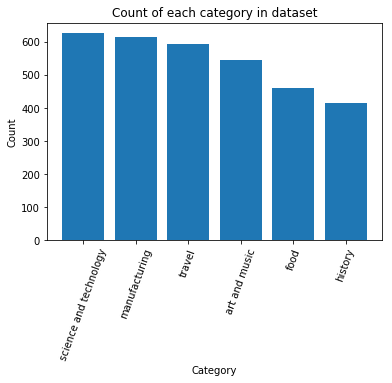

In [20]:
# plotting a bar graph for counts of each category in dataset
categories=df.Category.value_counts().index
count=df.Category.value_counts()

index = np.arange(len(categories))
plt.bar(index,count)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(index, categories, fontsize=10, rotation=70)
plt.title('Count of each category in dataset')
plt.ylim()
plt.show()

## Data Preprocessing

The data pre processing task here will comprise of text processing as we are going to deal with the collection of text.
For this,i will be building a NLP pipeline that will perform the following fucntions:

1-Convert all the text to lower case

2-Remove punctuations

3-Tokenize text into words

4-Removing stopwords

5-Lemmatization

In [21]:
#NLP pipeline
def tokenize(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z0-9]',' ',text)
    tokens=word_tokenize(text)
    tokens=[w for w in tokens if w not in stopwords.words('english')]
    tokens=[WordNetLemmatizer().lemmatize(w).strip() for w in tokens]
    return tokens

## Building Machine Learning model to classify videos

In [43]:
#Label Encoding the category column
df=pd.read_csv('df_merged.csv')
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [44]:
df.Category.value_counts()

4    627
3    614
5    594
0    546
1    461
2    417
Name: Category, dtype: int64

In [45]:
#extracting features and labels
X=df['Title']
y=df['Category']


In [46]:
print(X.head())
print(y.head())

0    Ep 1| Travelling through North East India | Of...
1    Backpacking In Meghalaya | NorthEast India Tri...
2      How do I travel so much ! How do I earn money!!
3    Travel Vlog | Weekend In Pondicherry | Kritika...
4          EXPLORING VARANASI | Benaras Travel Vlog #1
Name: Title, dtype: object
0    5
1    5
2    5
3    5
4    5
Name: Category, dtype: int64


In [47]:
#creating training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### 1-Naive Bayes

Naive Bayes is selected because it is easy and fast to predict the class and it also take less training data .The classification here is multi-class classification and naive bayes performs well on multi-class dataset.



In [49]:
#building pipeline
nb_pipeline= Pipeline([('vect',CountVectorizer(tokenizer=tokenize)),
                            ('tfidf',TfidfTransformer()),
                            ('clf',MultinomialNB())])
#training pipeline
nb_model=nb_pipeline.fit(X_train,y_train)

In [50]:
#testing our trained model
y_pred=nb_model.predict(X_test)

In [51]:
#recording each metrics
nb_precision=precision_score(y_test,y_pred,average=None).mean()
nb_recall=recall_score(y_test,y_pred,average=None).mean()
nb_f1=f1_score(y_test,y_pred,average=None).mean()

In [52]:
print("Average precision score of Naive Bayes is {}".format(nb_precision))
print("Average recall score of Naive Bayes is {}".format(nb_recall))
print("Average f1 score of Naive Bayes is {}".format(nb_f1))


Average precision score of Naive Bayes is 0.9591518676950331
Average recall score of Naive Bayes is 0.9480257116620754
Average f1 score of Naive Bayes is 0.951103541934457


### 2-Random Forest(Boosting ensemble method)

It is a boosting ensemble method in which several decision tree(weak learner) are run in sequence such that next decision tree model tries to minimizes the error generated by the previous model.
Random forest is implemented here because it reduces Overfitting and also dont need feature normalization.

In [53]:
#building pipeline
random_forest_pipeline= Pipeline([('vect',CountVectorizer(tokenizer=tokenize)),
                            ('tfidf',TfidfTransformer()),
                            ('clf',RandomForestClassifier())])
#training pipeline
random_forest_model=random_forest_pipeline.fit(X_train,y_train)

In [54]:
#testing our trained model
y_pred=random_forest_model.predict(X_test)

In [55]:
#recording metrics
random_forest_precision=precision_score(y_test,y_pred,average=None).mean()
random_forest_recall=recall_score(y_test,y_pred,average=None).mean()
random_forest_f1=f1_score(y_test,y_pred,average=None).mean()

In [56]:
print("Average precision score of RandomForestClassifier is {}".format(random_forest_precision))
print("Average recall score of RandomForestClassifier is {}".format(random_forest_recall))
print("Average f1 score of RandomForestClassifier is {}".format(random_forest_f1))


Average precision score of RandomForestClassifier is 0.9748491680085882
Average recall score of RandomForestClassifier is 0.9734584817303595
Average f1 score of RandomForestClassifier is 0.9739274691758597


### 3- Neural Network

In [57]:
#creating training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
y_test_temp=y_test

In [58]:
from keras.preprocessing.text import Tokenizer
num_labels = 6
vocab_size = 15000
batch_size = 100
 
#define Tokenizer with Vocab Size
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

#creating tfidf matrix
X_train = tokenizer.texts_to_matrix(X_train, mode='tfidf')
X_test = tokenizer.texts_to_matrix(X_test, mode='tfidf')

y_train= (keras.utils.to_categorical(y_train))
y_test=(keras.utils.to_categorical(y_test))

#defining sequential model
model = Sequential()

#adding layers to model
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(6))
model.add(Activation('softmax'))
model.summary()
 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#fitting model to training set
 
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               7680512   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 3078      
__________

In [59]:
#getting prediction on test set
y_pred=model.predict(X_test)
y_pred_cls=model.predict_classes(X_test)

652/652 [==============================] - 1s 1ms/step


In [60]:
#recording metrics
nn_precision=precision_score(y_test_temp,y_pred_cls,average=None).mean()
nn_recall=recall_score(y_test_temp,y_pred_cls,average=None).mean()
nn_f1=f1_score(y_test_temp,y_pred_cls,average=None).mean()

In [61]:
print("Average precision score of NeuralNetwork is {}".format(nn_precision))
print("Average recall score of NeuralNetwork is {}".format(nn_recall))
print("Average f1 score of NeuralNetwork is {}".format(nn_f1))


Average precision score of NeuralNetwork is 0.972855518610051
Average recall score of NeuralNetwork is 0.972844962685497
Average f1 score of NeuralNetwork is 0.9728448020599569


### Refinement

All the above model are giving high performance on all three metrics(approximately 95%) so there is no need for any refinement.
If GridSearch is used for refinement it would take lots of time and would hardly give any changes in any metrics.

## Model Evaluation and Validation

Using the three metrics  discussed above, i am going to visually compare each model for each metrics using bar plot

In [62]:
#setting up required items for bar plot
label=['Naive Bayes','Random Forest','Neural Network']
precision=[nb_precision,random_forest_precision,nn_precision]
recall=[nb_recall,random_forest_recall,nn_recall]
f1=[nb_f1,random_forest_f1,nn_f1]

In [65]:
#method for plotting bar plot
def plot_bar(metrics,y_label,title):
    index = np.arange(len(label))
    plt.bar(index,metrics)
    plt.xlabel('Algorithm', fontsize=10)
    plt.ylabel(y_label, fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title(title)
    plt.ylim(0.90,1.0)
    plt.show()

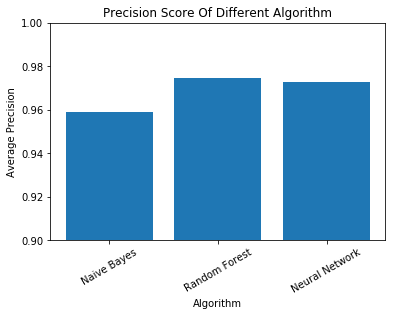

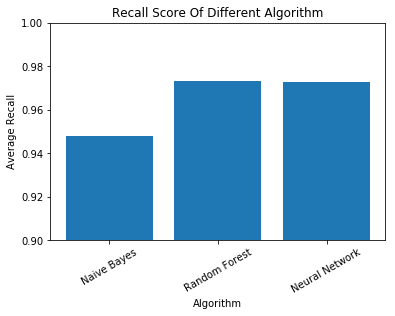

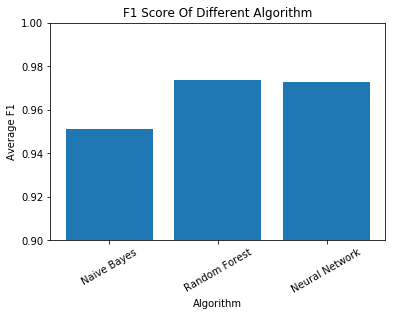

In [66]:
plot_bar(precision,'Average Precision','Precision Score Of Different Algorithm')
plot_bar(recall,'Average Recall','Recall Score Of Different Algorithm')
plot_bar(f1,'Average F1','F1 Score Of Different Algorithm')


# Justification

Naive Bayes performs poorer than Random Forest and Neural Network and gives less score on precision,recall and f1.
Random Forest and Neural Network almost performs same and gives approximately same score on precision,recall and f1.
The final model that i prefer is Random Forest as it is more precise than all the rest two.This algorithm worked better because it gets trained by combining rsults from different decision tree(weak learner)  to give final model(strong learner)

## Conclusion

Finally,the problem for classifying videos is solved.A machine learning model is build that can classify any video into 6 different categories.The most difficult and interesting part of this project was scrapping and creating a dataset from youtube as it took a huge amount of time(nearly 2 days).

Improvements:The dataset here contains only 3259 rows that means there are very less records for each categories.Splitting this dataset into training and testing set results in less data for each category for the model to get trained on.If the data for each category is increased to atleast 1500 data than our model will get trained well and would give more performance than the model here.